In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing CSV file
df = pd.read_csv('/home/eric/Documents/datascience-class/Assignment_7/insurance.csv')

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

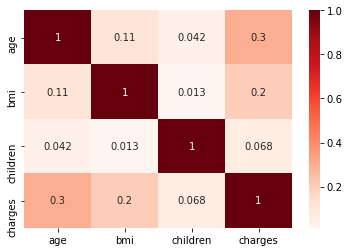

In [6]:
# Showing correlataion using a heatmap
plt.figure
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
# Checking for Null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [8]:
# Checking for duplicates 
df_duplicates = df.duplicated().sum()
df_duplicates

1

In [9]:
# Checking for Duplicated row
duplicate = df[df.duplicated()]
duplicate

age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [10]:
# Dropping the duplicate column
df.drop_duplicates(keep= False, inplace = True )

In [11]:
#Checking the duplicates 
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

In [12]:
df.shape

(1336, 7)

In [13]:
# making a copy of the Dataframe
df_copy = df.copy()

In [14]:
df_copy.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [17]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<Figure size 360x432 with 0 Axes>

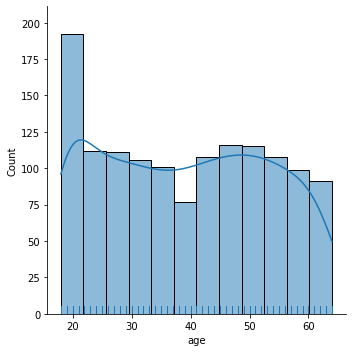

In [45]:
# Q3
plt.figure(figsize=(5, 6))
sns.displot(x=df_copy['age'], kde=True, rug=True)
plt.show()

In [46]:
# Set & Feature Scaling
X = df_copy.iloc[:,:-1].values
y = df_copy.iloc[:,6].values

In [47]:
# Using LabelEncoder to convert sex to numerical data
from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()
X[:,1] = lb_encode.fit_transform(X[:,1])

In [48]:
# Converting Smoker to numerical data 
from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()
X[:,4] = lb_encode.fit_transform(X[:,4])


In [49]:
# Encoding the region column
from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()
X[:,5] = lb_encode.fit_transform(X[:,5])

In [51]:
# Setting up 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [52]:
X_train

array([[31, 0, 29.1, 0, 0, 3],
       [25, 0, 26.79, 2, 0, 1],
       [36, 1, 35.2, 1, 1, 2],
       ...,
       [46, 0, 34.6, 1, 1, 3],
       [46, 0, 19.95, 2, 0, 1],
       [42, 1, 26.125, 2, 0, 0]], dtype=object)

In [53]:
# Q4 Dsiplaying continous and discrete columns

numerical_continous =  df_copy[['age', 'bmi']]
numerical_continous.head()

age     bmi
0   19  27.900
1   18  33.770
2   28  33.000
3   33  22.705
4   32  28.880

In [54]:
# Numerical Discrete 
numerical_discrete =  df_copy[['children']]
numerical_discrete.head()

children
0         0
1         1
2         3
3         0
4         0

In [55]:
# Q5 identiying presence of any outliers in the numerical continous columns
df_data = pd.DataFrame(numerical_continous)

<AxesSubplot:>

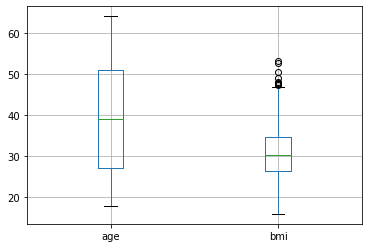

In [35]:
df_data.boxplot()

In [56]:
from scipy import stats
zscore = np.abs(stats.zscore(df_data))
zscore

array([[1.44207691, 0.45299913],
       [1.51333536, 0.50922212],
       [0.80075085, 0.38300229],
       ...,
       [1.51333536, 1.01410141],
       [1.29956001, 0.79723501],
       [1.55077805, 0.26121057]])

In [57]:
threshold = 2
np.where(zscore > 2)

(array([  28,  116,  128,  172,  197,  231,  249,  285,  291,  355,  379,
         382,  400,  409,  411,  427,  437,  441,  453,  492,  520,  542,
         546,  548,  562,  571,  580,  658,  672,  678,  699,  794,  809,
         819,  845,  858,  865,  893,  928,  939,  948,  949, 1022, 1027,
        1045, 1072, 1083, 1086, 1129, 1131, 1154, 1203, 1224, 1284, 1310,
        1315, 1330]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [58]:
df_clean = df_data
df_clean = df_clean[(zscore < threshold ).all(axis=1)]

In [59]:
df_data.shape

(1336, 2)

In [60]:
df_clean.shape

(1279, 2)

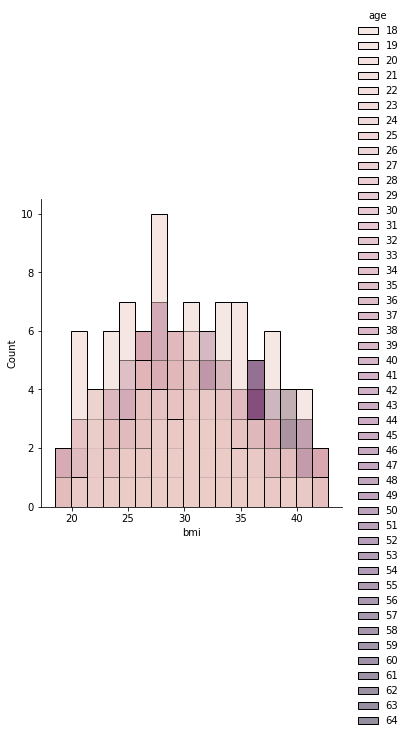

In [41]:
# Q6
sns.displot(df_clean, x="bmi", hue="age")

<AxesSubplot:>

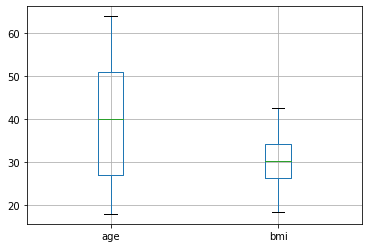

In [61]:
df_clean.boxplot()

In [42]:
df_copy.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [104]:
# Q7. Isolating all categorical columns 
categorical = df_copy[['sex', 'smoker', 'region']]
categorical

sex  smoker  region
0     NaN     NaN     NaN
1     NaN     NaN     NaN
2     NaN     NaN     NaN
3     NaN     NaN     NaN
4     NaN     NaN     NaN
...   ...     ...     ...
1333  NaN     NaN     NaN
1334  NaN     NaN     NaN
1335  NaN     NaN     NaN
1336  NaN     NaN     NaN
1337  NaN     NaN     NaN

[1336 rows x 3 columns]

In [71]:
X_train

array([[31, 0, 29.1, 0, 0, 3],
       [25, 0, 26.79, 2, 0, 1],
       [36, 1, 35.2, 1, 1, 2],
       ...,
       [46, 0, 34.6, 1, 1, 3],
       [46, 0, 19.95, 2, 0, 1],
       [42, 1, 26.125, 2, 0, 0]], dtype=object)

In [86]:
# Q8 Visually identifying the outliers in the discrete and categorical features
df_cat = pd.DataFrame(categorical)

In [87]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
    test[variable] = np.where(test[variable].isin(frequent_cat), test[variable], 'Rare')

In [101]:
df_copy2 = df.copy()

In [103]:
#Q 9
def encode_cat_vars(var,target):
    ordered_labels = df_copy.groupby([var])[target].mean().to_dict()
    df_copy[var] = df_copy[var].map(ordered_labels)
    
for var in categorical:
    encode_cat_vars(var, 'charges')
for var in numerical_discrete:
    encode_cat_vars(var, 'charges')
    
df_copy.head()

age  sex     bmi  children  smoker  region      charges
0   19  NaN  27.900       NaN     NaN     NaN  16884.92400
1   18  NaN  33.770       NaN     NaN     NaN   1725.55230
2   28  NaN  33.000       NaN     NaN     NaN   4449.46200
3   33  NaN  22.705       NaN     NaN     NaN  21984.47061
4   32  NaN  28.880       NaN     NaN     NaN   3866.85520